In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
data_MN = pd.read_csv("/content/drive/MyDrive/NYC Building Data/MN.csv")

In [4]:
data_MN.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoo

In [5]:
data_MN = data_MN[['ZipCode','Address','BldgClass','LandUse',
                   'OwnerType','OwnerName','LotArea','BldgArea',
                   'ComArea','ResArea','OfficeArea', 'RetailArea', 'GarageArea', 
                   'StrgeArea','FactryArea', 'OtherArea','NumFloors', 'UnitsRes','UnitsTotal','YearBuilt',
                   'YearAlter1', 'YearAlter2','BuiltFAR','CommFAR','XCoord', 'YCoord']]
data_MN.head(5)

,ZipCode,Address,BldgClass,LandUse,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,CommFAR,XCoord,YCoord
0,10004.0,1 GOVERNORS ISLAND,Y4,8.0,P,GOVERNORS ISLAND CORP,7736692,2725731,2725731,0,0,0,0,0,0,2725731,0.0,0,0,1900,0,0,0.35,0.0,979071.0,190225.0
1,10004.0,1 LIBERTY ISLAND,P7,8.0,X,U S GOVT LAND & BLDGS,541886,541886,541886,0,0,0,0,0,0,541886,0.0,0,0,1900,0,0,1.00,0.0,971677.0,190636.0
2,10004.0,1 ELLIS ISLAND,Z9,NaN,X,U S GOVT LAND & BLDGS,2764190,603130,603130,0,0,0,0,0,0,603130,0.0,0,0,1900,0,0,0.22,0.0,972790.0,193648.0
3,10004.0,JOE DIMAGGIO HIGHWAY,U0,7.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.00,0.0,NaN,NaN
4,10004.0,JOE DIMAGGIO HIGHWAY,U0,7.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.00,0.0,NaN,NaN


In [6]:
# Check percentage of null data
(data_MN.isnull().sum()/len(data_MN)*100)

ZipCode        0.365473
Address        0.179245
BldgClass      0.144327
LandUse        0.395735
OwnerType     58.336049
OwnerName      3.861912
LotArea        0.000000
BldgArea       0.000000
ComArea        0.000000
ResArea        0.000000
OfficeArea     0.000000
RetailArea     0.000000
GarageArea     0.000000
StrgeArea      0.000000
FactryArea     0.000000
OtherArea      0.000000
NumFloors      0.000000
UnitsRes       0.000000
UnitsTotal     0.000000
YearBuilt      0.000000
YearAlter1     0.000000
YearAlter2     0.000000
BuiltFAR       0.000000
CommFAR        0.000000
XCoord         1.538712
YCoord         1.538712
dtype: float64

In [7]:
data_MN["OwnerType"].unique()

array(['P', 'X', nan, 'C', 'O', 'M'], dtype=object)

    - C City Ownership
    - M Mixed City & Private Ownership
    - O Other – Public Authority, State or Federal Ownership
    - P Private Ownership – Either the tax lot has started an “in rem action or it was once city owned.
    - X Mixed (Excludes property with a C, M, O, or P ownership code). 
    Fully tax exempt property that could be owned by the city, state, or federal government; a public authority; or a private institution
    - blank Unknown (Usually Private Ownership)

In [8]:
# Rename NULL in OwnerType as UNK indicates an unknown ownership, we don't drop NULL here because it is not a mistake
data_MN["OwnerType"] = data_MN["OwnerType"].fillna("UNK").astype('category')
data_MN["OwnerType"] = data_MN["OwnerType"].cat.reorder_categories(['P', 'C', 'X', 'O', 'M', 'UNK'])

In [9]:
# Because the other NULL value is only ~1%, we decide to drop it for now
data_MN.dropna(inplace=True)

In [10]:
# Drop value(s) with coordinates 0
data_MN = data_MN[data_MN['XCoord'] != 0]

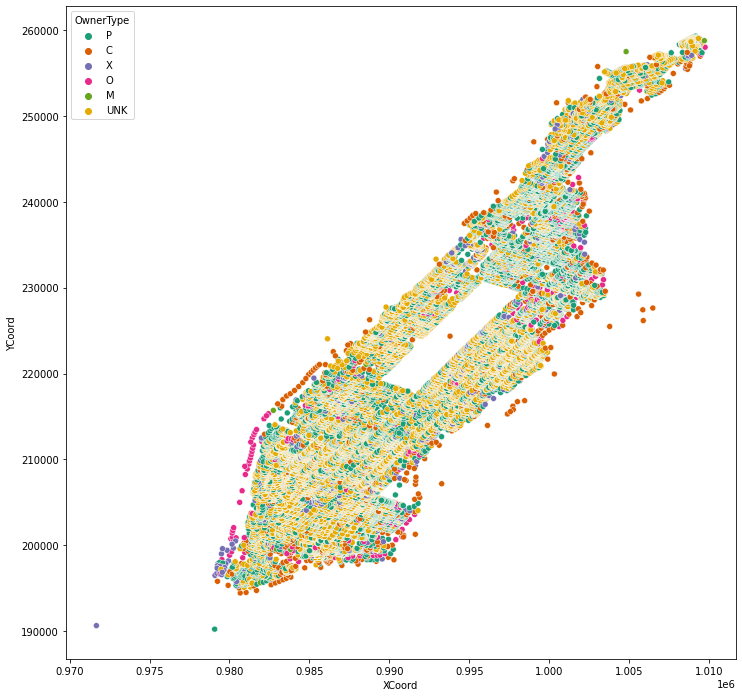

In [11]:
# Distribution of property by OwnerType
plt.figure(figsize=(12,12))
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_MN, hue='OwnerType', palette='Dark2');

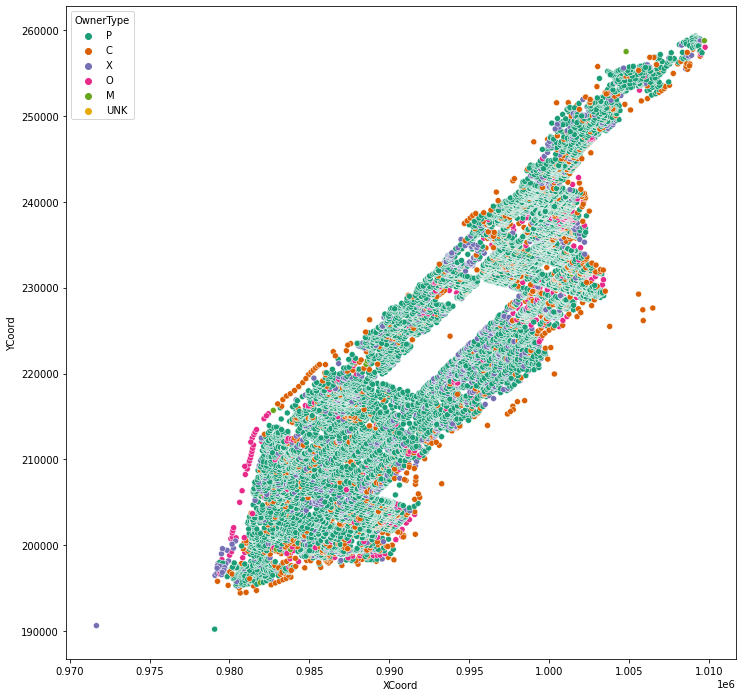

In [12]:
# Distribution of property by OwnerType (UNK excluded)
plt.figure(figsize=(12,12))
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_MN[data_MN['OwnerType'] != 'UNK'], hue='OwnerType', palette='Dark2');

    - 01 One &Two Family Buildings
    - 02 Multi-Family Walk-Up Buildings
    - 03 Multi-Family Elevator Buildings
    - 04 Mixed Residential & Commercial Buildings
    - 05 Commercial & Office Buildings
    - 06 Industrial & Manufacturing
    - 07 Transportation & Utility
    - 08 Public Facilities & Institutions
    - 09 Open Space & Outdoor Recreation
    - 10 Parking Facilities
    - 11 Vacant Land

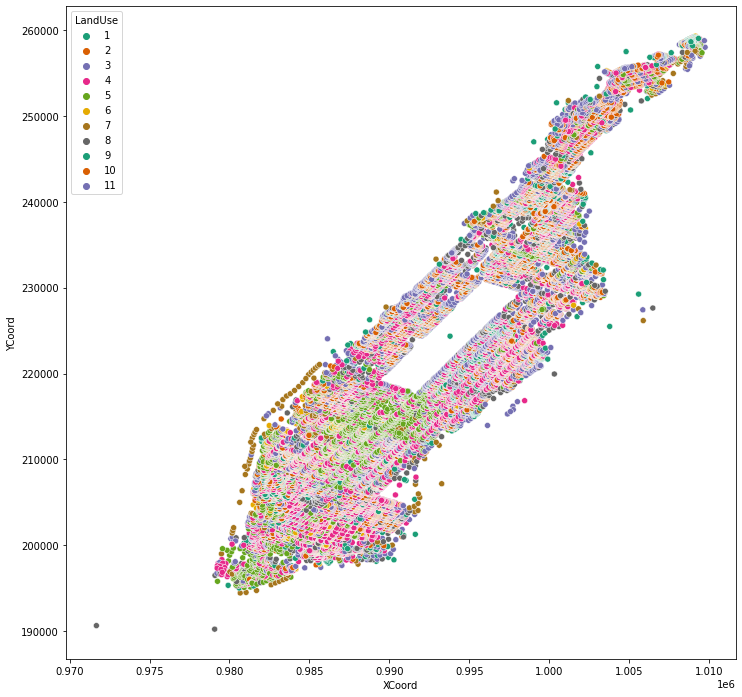

In [13]:
# Distribution of property by LandUse
plt.figure(figsize=(12,12))
data_MN['LandUse'] = data_MN['LandUse'].astype('int').astype('category')
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_MN, hue='LandUse', palette='Dark2');

**Investigate YearBuilt**

In [14]:
# Check how many building with unknown YearBuilt
sum(data_MN['YearBuilt'] == 0)/len(data_MN['YearBuilt'])*100

4.646191646191646

In [15]:
# Because it is only about 5%, I think we can remove that observation for now
data_MN_nonZero = data_MN[data_MN['YearBuilt'] != 0]
# Create Age variable by substracting current year with YearBuilt
data_MN_nonZero['Age'] = 2021 - data_MN_nonZero['YearBuilt']

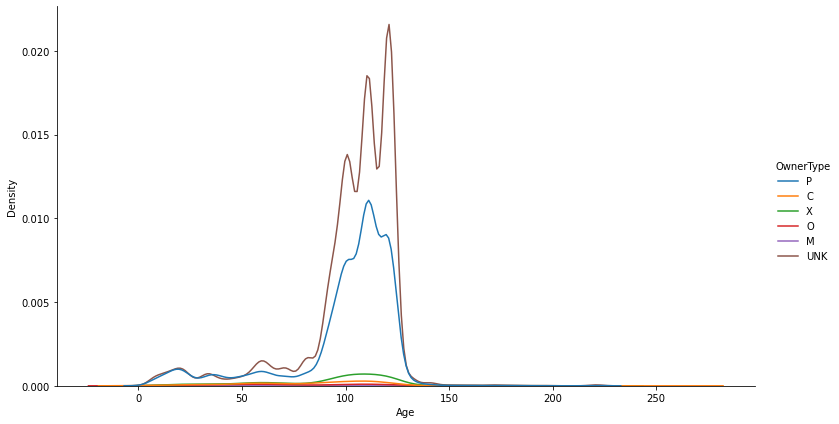

In [16]:
sns.displot(data=data_MN_nonZero, x='Age', hue='OwnerType', kind='kde', height=6, aspect=1.8);

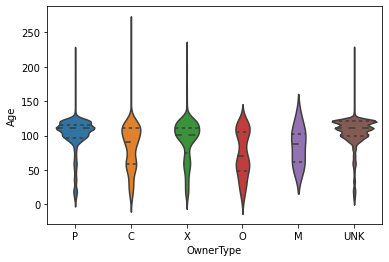

In [17]:
sns.violinplot(x='OwnerType', y='Age', data=data_MN_nonZero, inner="quartile")

In [18]:
data_MN_nonZero.head()

,ZipCode,Address,BldgClass,LandUse,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,CommFAR,XCoord,YCoord,Age
0,10004.0,1 GOVERNORS ISLAND,Y4,8,P,GOVERNORS ISLAND CORP,7736692,2725731,2725731,0,0,0,0,0,0,2725731,0.0,0,0,1900,0,0,0.35,0.0,979071.0,190225.0,121
1,10004.0,1 LIBERTY ISLAND,P7,8,X,U S GOVT LAND & BLDGS,541886,541886,541886,0,0,0,0,0,0,541886,0.0,0,0,1900,0,0,1.00,0.0,971677.0,190636.0,121
5,10004.0,MARGINAL STREET,Y7,7,C,NYC DSBS,209215,280000,280000,0,0,0,0,0,0,280000,5.0,0,0,1900,2006,0,1.34,2.0,980670.0,194440.0,121
6,10004.0,10 SOUTH STREET,Y7,7,C,"10 SSA LANDLORD, LLC",191502,158197,158197,0,0,0,0,0,0,158197,5.0,0,0,1900,2014,0,0.83,3.4,981037.0,194506.0,121
8,10004.0,1 PIER 6,T2,7,C,NYC DSBS,510025,24346,24346,0,0,0,0,0,0,24346,2.0,0,0,1987,0,0,0.05,3.4,981687.0,194732.0,34


**How many building was altered since it was built?**

In [19]:
# Only use the latest YearAlter
# Note: This code a bit inefficient, should be another way that could process faster
tmp = []
for i in range(0,len(data_MN_nonZero)):
  YearAlter1 = data_MN_nonZero.iloc[i]['YearAlter1']
  YearAlter2 = data_MN_nonZero.iloc[i]['YearAlter2']
  if YearAlter2 == 0:
    tmp.append(YearAlter1)
  else:
    tmp.append(YearAlter2)

In [20]:
data_MN_nonZero['YearAlter'] = tmp

In [21]:
# There are 56% of building was altered since it was built!
sum(data_MN_nonZero['YearAlter'] != 0)/len(data_MN_nonZero['YearAlter'])*100

56.249838954881604

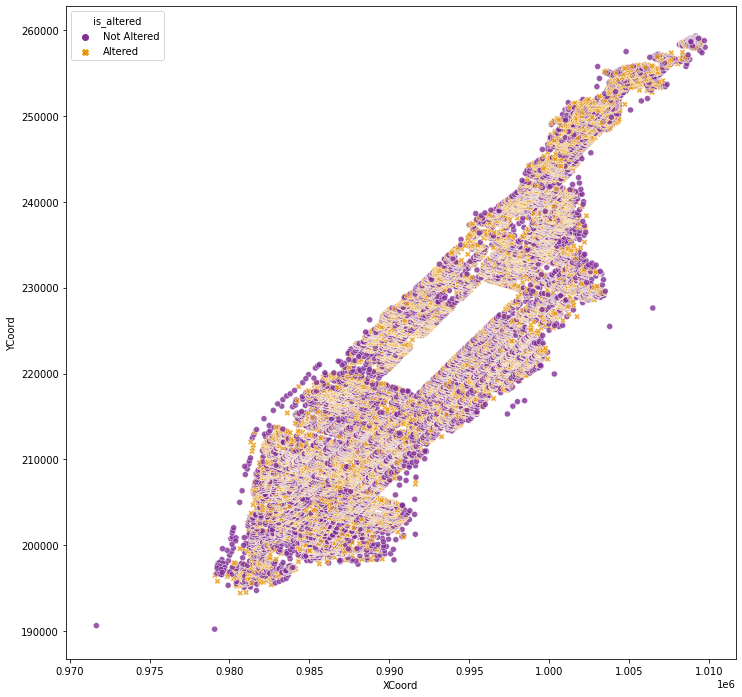

In [22]:
# Distribution of property that already altered
plt.figure(figsize=(12,12))
data_MN_nonZero['is_altered'] = np.where(data_MN_nonZero['YearAlter']== 0, "Not Altered", "Altered")
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_MN_nonZero, hue='is_altered', style='is_altered', palette='CMRmap',alpha=0.8);

In [23]:
data_MN_nonZero['ZipCode'] = data_MN_nonZero['ZipCode'].astype('int').astype('category')
pd.pivot_table(data_MN_nonZero, values=['Age'], 
                     index=['ZipCode'], aggfunc=[np.mean, np.median, np.std]).transpose()

,ZipCode,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,10012,10013,10014,10016,10017,10018,10019,10020,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10037,10038,10039,10040,10044,10045,10065,10069,10075,10103,10112,10118,10119,10123,10128,10129,10280,10281,10282,10463
mean,Age,94.61894,101.683024,106.958026,91.322581,85.029851,85.078431,89.532967,103.344190,96.575318,106.641728,109.527066,102.840176,109.621533,97.935178,85.759524,92.973077,91.918835,80.750000,99.328358,92.567755,105.425125,111.196586,102.785141,101.674713,102.868288,99.403282,98.355426,104.885827,105.665362,104.160714,99.460362,87.251012,91.805250,94.067725,97.851515,95.171233,95.055556,91.014925,56.60000,99.0,103.002991,24.285714,100.574815,101.000000,84.0,90.0,77.500000,91.0,99.791962,100.6000,34.722222,32.25,21.714286,96.480583
median,Age,101.00000,111.000000,111.000000,101.000000,93.000000,95.000000,101.000000,121.000000,101.000000,111.000000,121.000000,106.000000,111.000000,105.000000,93.000000,99.000000,101.000000,83.000000,111.000000,101.000000,111.000000,120.000000,104.000000,111.000000,111.000000,101.000000,111.000000,111.000000,111.000000,110.000000,104.000000,94.000000,111.000000,101.000000,111.000000,111.000000,101.000000,96.000000,46.00000,99.0,111.000000,22.000000,111.000000,101.000000,84.0,90.0,77.500000,91.0,101.000000,98.0000,34.000000,35.00,23.000000,97.500000
std,Age,28.30440,28.617011,24.494560,30.346965,35.015135,35.285035,29.746563,29.440067,25.740616,22.991373,24.992137,23.985493,22.631415,23.870774,28.747137,27.708350,28.235315,10.067628,22.731125,28.663429,21.799819,16.582668,18.906156,30.749123,25.704171,22.088583,29.666054,18.858946,16.862161,21.197097,19.518173,21.564511,39.449917,27.537910,28.045216,34.417961,24.482144,19.273974,38.35101,NaN,22.868342,15.934389,21.296932,14.142136,NaN,NaN,27.577164,NaN,21.845368,6.0663,20.444489,5.50,6.237368,22.907813


**Now we will investigate distribution of LandUse and OwnerType with other variables**

In [24]:
pd.pivot_table(data_MN, values=['LotArea','BldgArea','ComArea','ResArea','OfficeArea','RetailArea','GarageArea','StrgeArea','FactryArea', 'OtherArea'], 
                     index=['LandUse'], aggfunc=[np.mean, np.median])

mean                              ...  median                     
              BldgArea        ComArea   FactryArea  ... ResArea RetailArea StrgeArea
LandUse                                             ...                             
1          4113.934788       3.620147     0.000000  ...    3234          0         0
2          9084.480391     149.586616     0.511817  ...    6735          0         0
3         87246.571429    3934.379562     0.569552  ...   44336          0         0
4         32413.127186    5587.635356     5.913808  ...    7152       1650         0
5        114273.554220  103113.988884   345.639519  ...       0       3729         0
6         34678.074214   33380.171069  4501.088050  ...       0       1775      3500
7         34873.987461   34868.467085     0.000000  ...       0          0         0
8         71965.571429   67418.933688     6.393778  ...       0          0         0
9          6809.303207    6728.370262     0.000000  ...       0          0         0
10        12862.307346   12824.263868     0.000000  ...       0          0         0
11            0.000000       0.000000     0.000000  ...       0          0         0

[11 rows x 20 columns]

In [25]:
pd.pivot_table(data_MN, values=['LotArea','BldgArea','ComArea','ResArea','OfficeArea','RetailArea','GarageArea','StrgeArea','FactryArea', 'OtherArea'], 
                     index=['OwnerType'], aggfunc=[np.mean, np.median])

mean                 ...     median          
                BldgArea        ComArea  ... RetailArea StrgeArea
OwnerType                                ...                     
P           47401.952061   24825.457862  ...          0         0
C           57132.412178   48799.729899  ...          0         0
X           61040.036908   48731.795961  ...          0         0
O          227438.480556   83358.252778  ...          0         0
M          242453.400000  119838.866667  ...          0         0
UNK         29322.696111    9755.547129  ...          0         0

[6 rows x 20 columns]

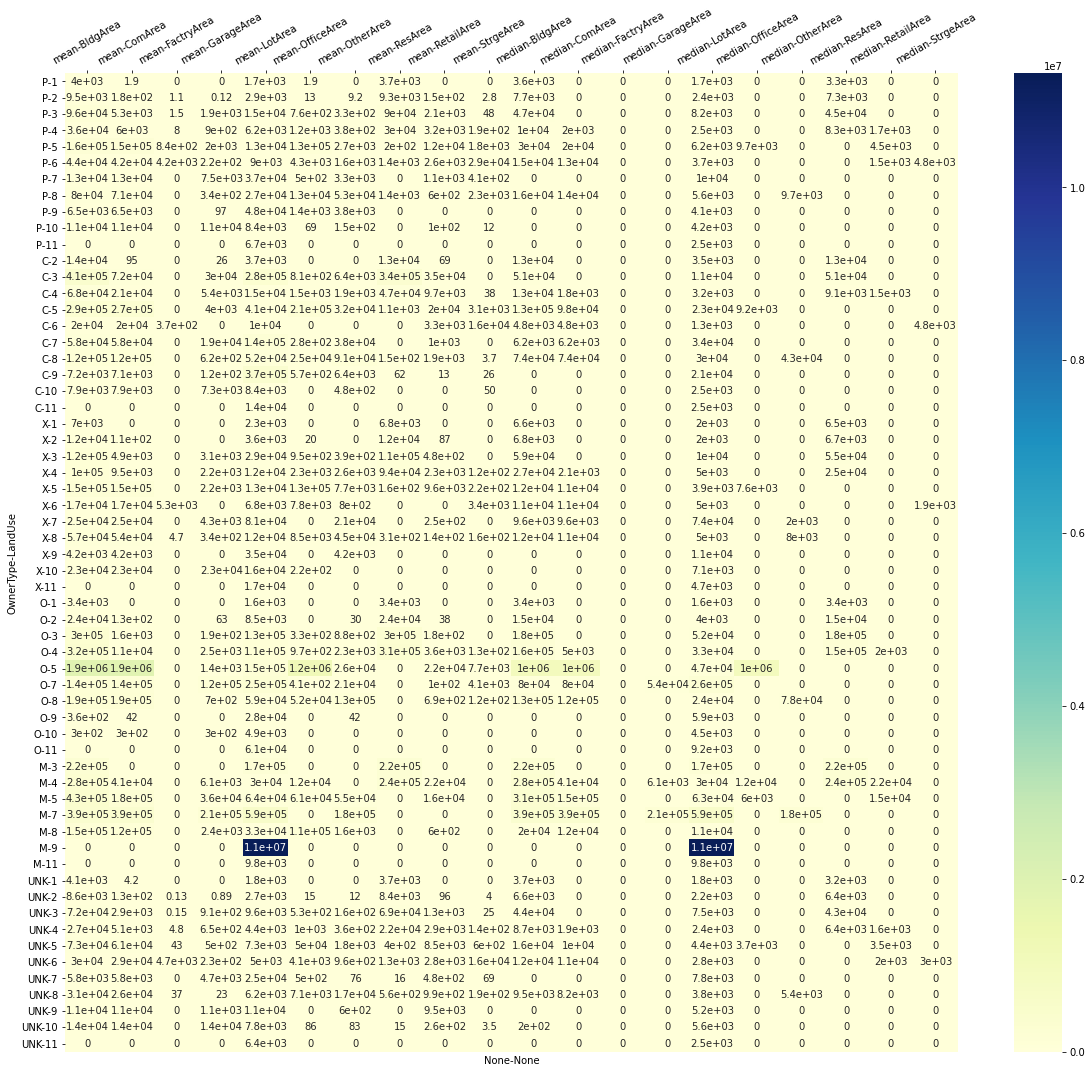

In [26]:
tab = pd.pivot_table(data_MN, values=['LotArea','BldgArea','ComArea','ResArea','OfficeArea','RetailArea','GarageArea','StrgeArea','FactryArea', 'OtherArea'], 
                     index=['OwnerType','LandUse'], aggfunc=[np.mean, np.median])
plt.figure(figsize=(20,18))
ax = sns.heatmap(tab, annot=True, cmap="YlGnBu");
ax.xaxis.tick_top()
plt.xticks(rotation=30);

**Save Cleaned Version**

  - Renamed NAN in OwnerType as UNK
  - Drop NULL values for the rest of variables (only ~1%)

In [27]:
data_MN.to_csv("data_MN_cleaned.csv", index=False)